## Data analysis for R&D purpose to analyse the growth of larvea of black soldier flies

In [1]:
# import python basic libraries

import numpy as np
import pandas as pd
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
# load and read

nta = pd.read_csv('Nutrition_Technologies_SQL_Takehome_A.csv')

In [3]:
# load and read

ntb = pd.read_csv('Nutrition_Technologies_SQL_Takehome_B.csv')

## Data cleaning, removing duplicates and correcting typo errors

In [4]:
# review File A

nta.head()

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
0,2020-06-13,Saturday,NaN,NaN,NaN,NaN
1,2020-06-14,Sunday,NaN,NaN,NaN,NaN
2,2020-06-15,Monday,NaN,NaN,NaN,NaN
3,2020-06-16,Tuesday,NaN,NaN,NaN,NaN
4,2020-06-17,Wednesday,NaN,NaN,NaN,NaN


In [5]:
# review File B

ntb.head()

,Date_51h,Daily_Total_51h,L210324,L210325,L210326,L210327,L210328,L210329,L210330,L210331,...,L210905,L210906,L210907,L210908,L210909,L210910,G210910,L210911,L210912,L210913
0,2021-04-15,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-17,27.0,24.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-18,7.0,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-19,63.0,NaN,12.0,52.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# check for null values in File A

nta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IY_date                         1061 non-null   object 
 1   IY_day                          1055 non-null   object 
 2   IY_SILC_pupae_batch             344 non-null    object 
 3   IY_SILC_pupae_per_cage_kg       306 non-null    float64
 4   IY_SILC_number_of_cages_filled  334 non-null    float64
 5   IY_SILC_days_in_insectary       335 non-null    float64
dtypes: float64(3), object(3)
memory usage: 49.9+ KB


In [7]:
# Identify index of column 'IY_date' where value is null

np.where(nta['IY_date'].isnull())[0]

array([488], dtype=int64)

In [8]:
# Identify batch number where column 'IY_date' is null

nta.loc[488]

IY_date                               NaN
IY_day                                NaN
IY_SILC_pupae_batch               G210910
IY_SILC_pupae_per_cage_kg             NaN
IY_SILC_number_of_cages_filled        6.0
IY_SILC_days_in_insectary            18.0
Name: 488, dtype: object

In [9]:
# delete row index 488 from nta

nta.drop(488, axis=0, inplace=True)

In [10]:
# delete column 'G210910' due to 'IY_date' being null

ntb.drop('G210910', axis=1, inplace=True)

In [11]:
# convert to datetime format

nta.IY_date = pd.to_datetime(nta.IY_date, format='%Y-%m-%d')
ntb.Date_51h = pd.to_datetime(ntb.Date_51h, format='%Y-%m-%d')

In [13]:
# retrieve index to synchronise with first relevant batch in File B with File Aie. batch 'L210324'

to_keep = nta[nta['IY_SILC_pupae_batch']=='L210324'].index.tolist()
to_keep = str(to_keep)[1:-1]
to_keep = int(to_keep)

In [15]:
# keep values in File A from batch 'L210324' onwards

nta = nta.iloc[to_keep:,:]

In [16]:
# review File A to ensure it starts with batch 'L210324' as indicated in B file

nta.head()

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
304,2021-04-13,Tuesday,L210324,60.0,7.0,18.0
305,2021-04-14,Wednesday,L210325,62.0,8.0,18.0
306,2021-04-15,Thursday,L210326,51.0,11.0,18.0
307,2021-04-16,Friday,L210327,55.0,11.0,18.0
308,2021-04-17,Saturday,L210328,40.0,11.0,18.0


In [17]:
# Identify batches which are unique to both File A & B. Batch found in A but not in B.

A_list = nta.IY_SILC_pupae_batch.tolist()
B_list = ntb.columns.tolist()
list(set(A_list)-set(B_list))

[nan,
 'L210809',
 'L210807',
 'L210805',
 'L210808',
 'L210621',
 'G210523',
 'L210410',
 'L210814 & L210815 (RnD pupae)',
 'L210914']

In [18]:
# Identify anomalies in File A in column 'IY_SILC_pupae_batch' having 'L210814 & L210815 (RnD pupae)'

nta[nta['IY_SILC_pupae_batch']=='L210814 & L210815 (RnD pupae)']

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
463,2021-09-04,Saturday,L210814 & L210815 (RnD pupae),52.0,1.0,18.0


In [19]:
# change 'L210814 & L210815 (RnD pupae)' to 'L210815'

nta.loc[463,'IY_SILC_pupae_batch']='L210815'

In [20]:
# Check whether there are any batches in File B but not in A

A_list = nta.IY_SILC_pupae_batch.tolist()
B_list = ntb.columns.tolist()
list(set(B_list)-set(A_list))

['Date_51h', 'Daily_Total_51h', 'L210815_', 'G210601']

In [21]:
# Correct anomalies in File B, changing 'L210815_' to 'L210815'

ntb.rename(columns={'L210815_':'L210815'}, inplace=True)

In [22]:
# drop batch 'G210601' in File B which is not found in File A

ntb.drop('G210601', axis=1, inplace=True)

In [23]:
# identify columns where all rows are null

for i in ntb.columns:
    x = ntb[i].isnull().sum()
    if x > 909:
        print(i)

L210421


In [24]:
ntb.drop('L210421', axis=1, inplace=True)
to_drop = nta[nta['IY_SILC_pupae_batch']=='L210421'].index.tolist()
nta.drop(to_drop, axis=0, inplace=True)

In [25]:
# Review after correcting 'L210814 & L210815 (RnD pupae)' to 'L210815'

A_list = nta.IY_SILC_pupae_batch.tolist()
B_list = ntb.columns.tolist()
diff_list = list(set(A_list)-set(B_list))
diff_list

[nan,
 'L210809',
 'L210807',
 'L210805',
 'L210808',
 'L210621',
 'G210523',
 'L210410',
 'L210914']

In [26]:
# Remove null value and review again

diff_list_clean = [x for x in diff_list if x == x]
diff_list_clean

['L210809',
 'L210807',
 'L210805',
 'L210808',
 'L210621',
 'G210523',
 'L210410',
 'L210914']

In [33]:
# Retrieve indexes from File A those batches which are in File A but not in B

total = []
for i in diff_list_clean:
    k = nta[nta['IY_SILC_pupae_batch']==i].index.tolist()
    total.append(k)
total = [x for y in total for x in y]

In [34]:
# Drop these batches by their indexes 

nta.drop(labels=total, axis=0, inplace=True)

In [39]:
# Drop any rows where batch numbers in column 'IY_SILC_pupae_batch' is null

nta = nta.dropna(axis=0, subset=['IY_SILC_pupae_batch'])

In [40]:
# identify duplicate values in File A

nta[nta.IY_SILC_pupae_batch.duplicated()]

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
368,2021-06-14,Monday,L210522,56.0,1.0,18.0
390,2021-06-28,NaN,G210604,58.0,6.0,18.0
436,2021-08-08,Sunday,L210718,44.0,2.0,25.0
442,2021-08-14,Saturday,L210717,61.0,2.0,23.0


In [41]:
# Summarize duplicate values in File A. 4 duplicate values

nta.IY_SILC_pupae_batch.duplicated().value_counts()

False    171
True       4
Name: IY_SILC_pupae_batch, dtype: int64

In [42]:
# Identify 1st duplicate value ie. batch number 'L210522'

nta[nta.IY_SILC_pupae_batch=='L210522']

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
363,2021-06-11,Friday,L210522,47.0,3.0,18.0
368,2021-06-14,Monday,L210522,56.0,1.0,18.0


In [43]:
# Identify 2nd duplicate value ie. batch number 'G210604'

nta[nta.IY_SILC_pupae_batch=='G210604']

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
383,2021-06-24,NaN,G210604,60.0,5.0,18.0
390,2021-06-28,NaN,G210604,58.0,6.0,18.0


In [44]:
# Identify 3rd duplicate value ie. batch number 'L210718'

nta[nta.IY_SILC_pupae_batch=='L210718']

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
434,2021-08-07,Saturday,L210718,55.0,5.0,25.0
436,2021-08-08,Sunday,L210718,44.0,2.0,25.0


In [45]:
# Identify 4th duplicate value ie. batch number 'L210717'

nta[nta.IY_SILC_pupae_batch=='L210717']

,IY_date,IY_day,IY_SILC_pupae_batch,IY_SILC_pupae_per_cage_kg,IY_SILC_number_of_cages_filled,IY_SILC_days_in_insectary
433,2021-08-06,Friday,L210717,53.0,8.0,19.0
442,2021-08-14,Saturday,L210717,61.0,2.0,23.0


In [46]:
# Drop the 4 duplicate values by their indexes

nta.drop([368,390,436,442], axis=0, inplace=True)

In [47]:
nta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 304 to 493
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   IY_date                         171 non-null    datetime64[ns]
 1   IY_day                          166 non-null    object        
 2   IY_SILC_pupae_batch             171 non-null    object        
 3   IY_SILC_pupae_per_cage_kg       170 non-null    float64       
 4   IY_SILC_number_of_cages_filled  171 non-null    float64       
 5   IY_SILC_days_in_insectary       171 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.4+ KB


In [48]:
ntb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Columns: 173 entries, Date_51h to L210913
dtypes: datetime64[ns](1), float64(172)
memory usage: 1.2 MB


## Data is cleaned

In [56]:
# Remove not needed column 'Daily_Total_51h'

ntb.drop('Daily_Total_51h',axis=1, inplace=True)

In [57]:
# add 2 additional empty rows to the beginning of File B to accommodate first batch 'L210324'

df1 = pd.DataFrame([[np.nan]* len(ntb.columns)], columns= ntb.columns)
ntb = ntb.append(df1, ignore_index=True)
ntb = ntb.append(df1, ignore_index=True)

In [58]:
# Shift the rows down by 2 rows

ntb = ntb.shift()
ntb = ntb.shift()

In [59]:
# Insert a new column 'days' as 1st column and render values from 1 - 20 days

ntb.insert(0, 'days', np.arange(1, ntb.shape[0]+1))
ntb.head()

,days,Date_51h,L210324,L210325,L210326,L210327,L210328,L210329,L210330,L210331,...,L210904,L210905,L210906,L210907,L210908,L210909,L210910,L210911,L210912,L210913
0,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2021-04-15,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2021-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2021-04-17,24.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Create new dataframe to extrate columns of File B

df2 = ntb.drop(['days','Date_51h'], axis=1)
df2.columns

Index(['L210324', 'L210325', 'L210326', 'L210327', 'L210328', 'L210329',
       'L210330', 'L210331', 'L210401', 'L210402',
       ...
       'L210904', 'L210905', 'L210906', 'L210907', 'L210908', 'L210909',
       'L210910', 'L210911', 'L210912', 'L210913'],
      dtype='object', length=171)

In [62]:
# Create new empty dataframe to populate fresh values for visualization

df = ntb[0:0]

In [63]:
# Populate days column with days ranging from 1 to 20

df.days = pd.Series(np.arange(1,21))

In [65]:
# Reset index

nta = nta.reset_index(drop=True)

In [67]:
# Import datetime library

from datetime import datetime as dt

In [68]:
# convert both tables to datetime format

nta.IY_date = pd.to_datetime(nta.IY_date, format='%Y-%m-%d')
ntb.Date_51h = pd.to_datetime(ntb.Date_51h, format='%Y-%m-%d')

In [69]:
# Initialize object for iteration for File A & B

k = np.arange(2,171)

In [70]:
# create dataframe with all values in it
# b will interate thru batch names
# i will interate thru values along columns of File B

for b, i in zip(df2.columns,k):
    last_index = ntb.loc[:,b].last_valid_index()
    t1 = ntb.loc[last_index,'Date_51h']
    t2 = nta.loc[i,'IY_date']
    
    diff = t1-t2
    diff = diff.days
    offset = last_index-diff
    df.loc[:,b] = pd.Series(ntb.iloc[offset:last_index,i]).reset_index(drop=True)

In [71]:
# df dataframe is fully populated by fresh values. Slice off data at the bottom which are not needed

df = df[:17]

In [72]:
# Drop column 'Date_51h' which is not needed

df = df.drop('Date_51h', axis=1)

In [73]:
# Review df dataframe

df.head()

,days,L210324,L210325,L210326,L210327,L210328,L210329,L210330,L210331,L210401,...,L210904,L210905,L210906,L210907,L210908,L210909,L210910,L210911,L210912,L210913
0,1,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,3,24.0,2.0,52.0,NaN,12.0,NaN,NaN,NaN,NaN,...,2.0,NaN,38.0,21.0,4.0,2.0,4.0,NaN,NaN,NaN
3,4,NaN,12.0,8.0,31.0,NaN,10.0,17.0,41.0,NaN,...,NaN,NaN,16.0,11.0,1.0,NaN,NaN,12.0,NaN,NaN
4,5,NaN,3.0,4.0,NaN,1.0,6.0,6.0,8.0,NaN,...,NaN,NaN,8.0,4.0,8.0,1.0,22.0,NaN,NaN,NaN


In [74]:
# create new column in dataframe 'total' to add up all values

df['total'] = df[df2.columns].sum(axis=1)

In [76]:
# consolidate to summary by using column 'days' and 'total'

summary = df[['days','total']]

## Summary file is uploaded to Google Cloud/Datastudio to add a new column  'percentage' for visualization

In [77]:
# Review summary file

summary

,days,total
0,1,40.0
1,2,288.0
2,3,499.0
3,4,711.0
4,5,853.0
5,6,2852.0
6,7,4709.0
7,8,6152.0
8,9,5832.0
9,10,7295.0


In [83]:
summary.to_csv('nt_summary.csv', index=False)

In [84]:
summation = summary['total'].sum()
summary_percentage = summary.copy()

# add a new column 'percentage' to capture increase in weight
summary_percentage['percentage'] = [i/summation for i in summary.total]

In [85]:
summary_percentage

,days,total,percentage
0,1,40.0,0.000377
1,2,288.0,0.002717
2,3,499.0,0.004708
3,4,711.0,0.006708
4,5,853.0,0.008048
5,6,2852.0,0.026908
6,7,4709.0,0.044428
7,8,6152.0,0.058042
8,9,5832.0,0.055023
9,10,7295.0,0.068826


In [86]:
# Visualising growth pattern

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

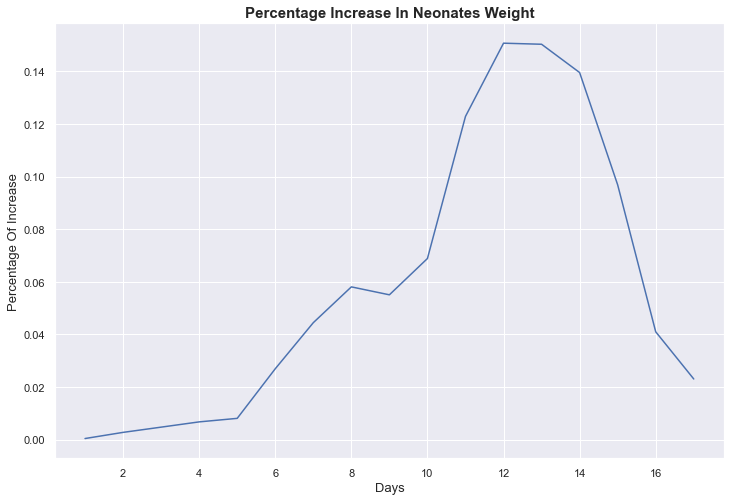

In [87]:
# visualize pattern of growth in weight based on days

plt.figure(figsize=(12,8))
sns.lineplot(data=summary_percentage, x='days', y='percentage');
plt.title('Percentage Increase In Neonates Weight', fontsize=15, fontweight='bold');
plt.xlabel('Days', fontsize=13)
plt.ylabel('Percentage Of Increase', fontsize=13);